<a href="https://colab.research.google.com/github/DBCooper200/project_dl/blob/main/CNN_model_mjr_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha /root/.kaggle/kaggle.json

-rw------- 1 root root 67 May 18 19:16 /root/.kaggle/kaggle.json


In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
!kaggle datasets download -d himanshuagarwal1998/glaucomadataset

100% 2.54G/2.54G [01:31<00:00, 38.8MB/s]
100% 2.54G/2.54G [01:31<00:00, 29.8MB/s]


In [5]:
!mkdir -p /content/Data_set
!unzip -q /content/glaucomadataset.zip -d /content/Data_set

In [6]:
import tensorflow 
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import cv2
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [7]:
path = ['/content/Data_set/Non Glaucoma', '/content/Data_set/Glaucoma']
images = []
labels = []
for n,i in enumerate(path):
    for j in tqdm(os.listdir(i)):
        img_path = os.path.join(i,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64,64))
        images.append(img)
        labels.append(n)
images = np.array(images)/255
labels = np.array(labels)

100%|██████████| 511/511 [00:11<00:00, 43.90it/s]


In [8]:
for n in enumerate(path):
  print(n)

#the labels assigned are 
# 0 for non glaucomic images
# 1 for glaucomic images

(0, '/content/Data_set/Non Glaucoma')
(1, '/content/Data_set/Glaucoma')


In [9]:
'''plt.figure(figsize=(20,20))
for i in range(1,26):
    plt.subplot(5,5,i)
    n = np.random.randint(1022)
    plt.imshow(images[n])
    plt.title(labels[n])'''

'plt.figure(figsize=(20,20))\nfor i in range(1,26):\n    plt.subplot(5,5,i)\n    n = np.random.randint(1022)\n    plt.imshow(images[n])\n    plt.title(labels[n])'

In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, labels = shuffle(images, labels, random_state=32)
x_train, x_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.15, random_state=44)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=40)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True, vertical_flip=True,
                            fill_mode='constant', cval=0.)
train_gen = datagen.flow(x_train, y_train, batch_size=32)
#Using TensorFlow backend.

#for test set
test_gen = datagen.flow(x_test, y_test, batch_size = 32)

In [13]:
classifier = Sequential()
#frist hidden layer

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#second hidden layer

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#last layer

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [15]:
tb_callback = tensorflow.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
#the above is done to get tensorboard logs which are then referred by callback parameter below
history = classifier.fit_generator(train_gen, epochs=100, steps_per_epoch=1,
                              verbose=1, validation_data=(x_valid,y_valid),
                              callbacks=[tb_callback])
#Number of Steps per Epoch = (Total Number of Training Samples) / (Batch Size)
#callbacks reqd as logs were needed and manual saving of model will be done furthur to the disk

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6893 - accuracy: 0.5312 - val_loss: 0.7426 - val_accuracy: 0.4610
Epoch 2/100
1/1 [==============================] - 0s 468ms/step - loss: 0.7319 - accuracy: 0.5000 - val_loss: 0.5872 - val_accuracy: 0.9416
Epoch 3/100
1/1 [==============================] - 0s 451ms/step - loss: 0.6124 - accuracy: 0.7188 - val_loss: 0.5320 - val_accuracy: 0.8442
Epoch 4/100
1/1 [==============================] - 0s 461ms/step - loss: 0.5855 - accuracy: 0.7500 - val_loss: 0.5069 - val_accuracy: 0.8312
Epoch 5/100
1/1 [==============================] - 1s 684ms/step - loss: 0.4999 - accuracy: 0.8750 - val_loss: 0.4703 - val_accuracy: 0.8442
Epoch 6/100
1/1 [==============================] - 1s 675ms/step - loss: 0.4660 - accuracy: 0.8750 - val_loss: 0.4287 - val_accuracy: 0.8506
Epoch 7/100
1/1 [==============================] - 0s 456ms/step - loss: 0.4429 - accuracy: 0.9062 - val_loss: 0.4034 - val_accuracy: 0.8442
Epoch 8/100
1/1 

In [ ]:
!tensorboard dev upload --logdir logs 

In [17]:
# Save the model
classifier.save('path_to_my_model.h5')

# Recreate the exact same model purely from the file
new_model = keras.models.load_model('path_to_my_model.h5')

In [18]:
#shows loss and accuracy
pred = new_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 25ms/step - loss: 0.2618 - accuracy: 0.8779


In [19]:
#obtaining an array of values obtained from model predicting on test data set 
#this is done to compare it with actual values
y_test_predicted=[]
for i in range(len(x_test)):
  res_test_imag = image.img_to_array(x_test[i])
  res_test_imag = np.expand_dims(res_test_imag, axis = 0)
  y_test_predicted.append(new_model.predict(res_test_imag,verbose=None))
y_test_predicted=np.array(y_test_predicted)

Text(0, 0.5, 'value indicating true or false(green->actual value, red->predicted value by model)')

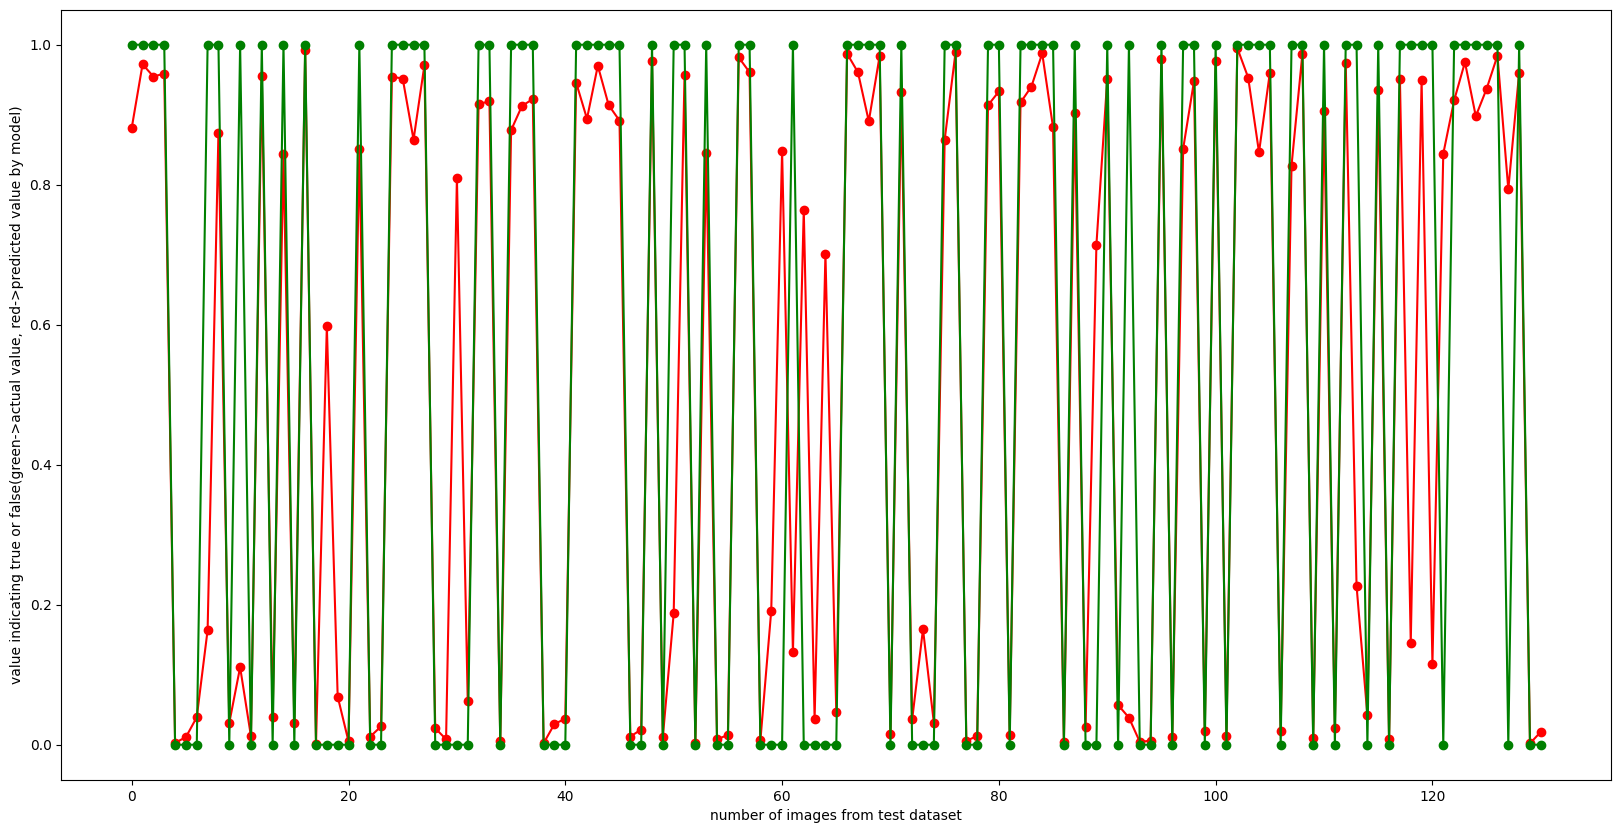

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20.0,10.0))
x_axis = len(x_test)
y_test_predicted_flattened=y_test_predicted.ravel()
y_test_flattened=y_test.ravel()
plt.plot(y_test_predicted_flattened,marker='o',color='red')
plt.plot(y_test_flattened,marker='o',color='green');
plt.xlabel('number of images from test dataset')
plt.ylabel("value indicating true or false(green->actual value, red->predicted value by model)")
#green->actual value
#red->predicted value by model

In [21]:
test_image_index=130
img=x_test[test_image_index]
#for i in range(10):
#s="/content/Data_set/Glaucoma/image13"+str(i)+"prime.tif"
#s="/content/Data_set/Non Glaucoma/image101prime.png"
#img = image.load_img(s, target_size = (64, 64))
test_image=img
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result_floatvalue = new_model.predict(test_image)
#>0.5->glaucoma
#<0.5->non glaucoma

1/1 [==============================] - 0s 20ms/step


In [22]:
if result_floatvalue>=0.5:
  result_intvalue=1
else:
  result_intvalue=0
#1->glaucoma
#0->non glaucoma
#this output is predicted by the model

In [23]:
print("the actual value is "+str(y_test[test_image_index]))
print("the predicted value by the model is "+str(result_floatvalue))
print("the predicted value converted to int is "+str(result_intvalue))

the actual value is 0
the predicted value by the model is [[0.01845089]]
the predicted value converted to int is 0


Text(0.5, 1.0, 'actual non glaucomic image\npredicted as non glaucomic image')

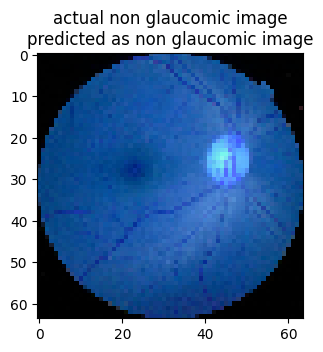

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(5,5,1)
plt.imshow(x_test[test_image_index])
#plt.imshow(x_test[test_image_index])
if y_test[test_image_index]==0:
  name="actual non glaucomic image"
else:
  name="actual glaucomic image"

if result_intvalue==0:
  name1="predicted as non glaucomic image"
else:
  name1="predicted as glaucomic image"
plt.title(name+"\n"+name1)